In [1]:
'''
Author: Tytrez Dixon
Date Written: 3/21/2025
Date Updated: __________

This jupyter notebook file tests the perceptron algorithm that was created
in the Perceptron.py file. This test is conducted on a chosen set of data
from the heart_disease_uci.csv file.
'''

'\nAuthor: Tytrez Dixon\nDate Written: 3/21/2025\nDate Updated: __________\n\nThis jupyter notebook file tests the perceptron algorithm that was created\nin the Perceptron.py file. This test is conducted on a chosen set of data\nfrom the heart_disease_uci.csv file.\n'

In [2]:
# Import the approrpriate packages/libraries.
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import imageio.v2 as imageio
import pandas as pd
from matplotlib import colormaps

In [3]:
'''
To lessen the likelihood of incorrect results, 
remove any rows in the "PerceptronTest - Sheet1.csv" file that contain null values for 
'thalch' or 'trestbps'.
'''

# Read the .csv file
TestData = pd.read_csv('PerceptronTest - Sheet1.csv')

# Remove rows which contain null ('NaN') values.
TestData.dropna(subset = ['thalch', 'trestbps'], inplace = True)

# Add a new coloumn of strictly 1's to accomodate the Perceptron algorithm
# NOTE: This coloumn name will be changed later!
TestData['ONE'] = 1

# Save the new dataframe into the original .csv file.
TestData.to_csv('PerceptronTest - Sheet1.csv', index = False)

TestData


thalch  trestbps  target  ONE
0     150.0     145.0       0    1
1     108.0     160.0       1    1
2     129.0     120.0       1    1
3     187.0     130.0       0    1
4     172.0     130.0       0    1
..      ...       ...     ...  ...
856   138.0     158.0       1    1
857   126.0     134.0       1    1
858   154.0     127.0       1    1
859   100.0     122.0       1    1
860    93.0     120.0       1    1

[861 rows x 4 columns]


Iteration: 0
Learning Rate: 1



Iteration: 1
Learning Rate: 1.0



Iteration: 2
Learning Rate: 0.9900990099009901



Iteration: 3
Learning Rate: 0.9706853038245



Iteration: 4
Learning Rate: 0.942412916334466



Iteration: 5
Learning Rate: 0.9061662657062173



Iteration: 6
Learning Rate: 0.8630154911487783



Iteration: 7
Learning Rate: 0.8141655576875266



Iteration: 8
Learning Rate: 0.7609023903621743



Iteration: 9
Learning Rate: 0.7045392503353466



Iteration: 10
Learning Rate: 0.6463662847113271



Iteration: 11
Learning Rate: 0.5876057133739336



Iteration: 12
Learning Rate: 0.5293745165530933



Iteration: 13
Learning Rate: 0.47265581835097614



Iteration: 14
Learning Rate: 0.4182794852663506



Iteration: 15
Learning Rate: 0.3669118291810093



Iteration: 16
Learning Rate: 0.3190537645052255



Iteration: 17
Learning Rate: 0.2750463487114013



Iteration: 18
Learning Rate: 0.23508234932598404



Iteration: 19
Learning Rate: 0.19922232993727462



Iteration: 20
Learning

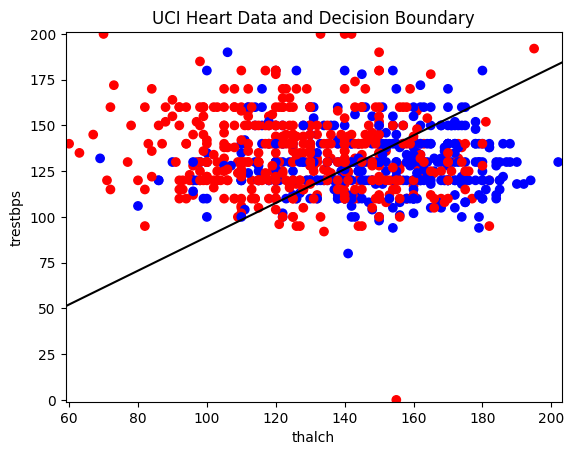

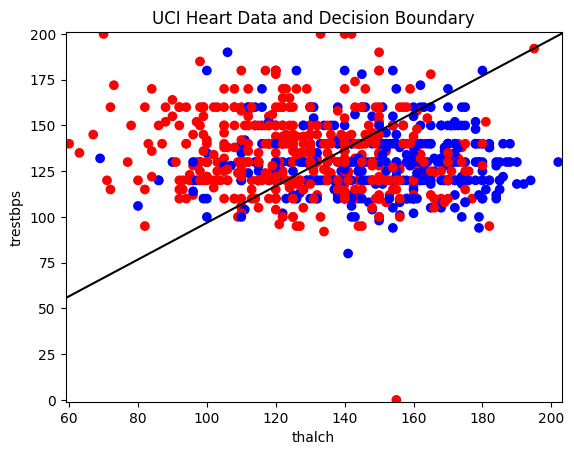

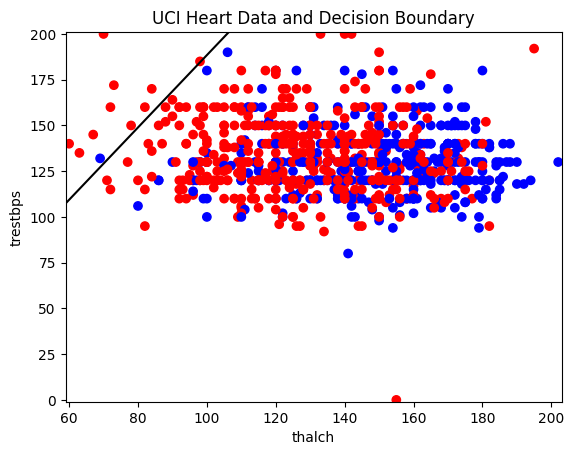

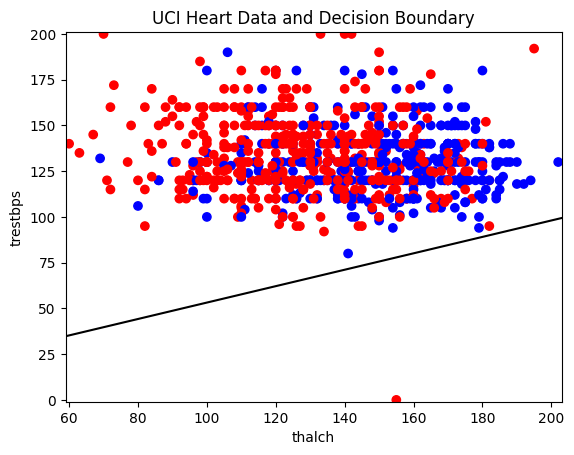

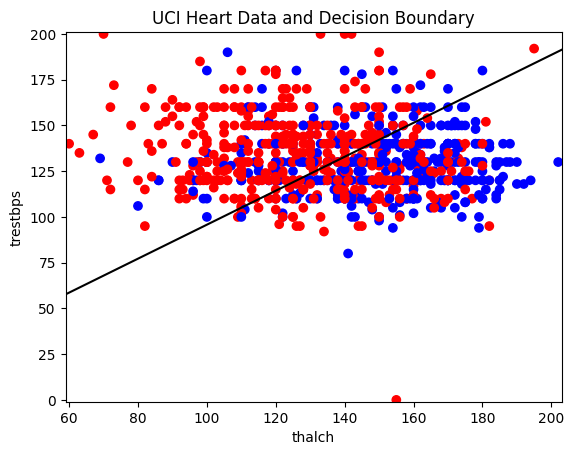

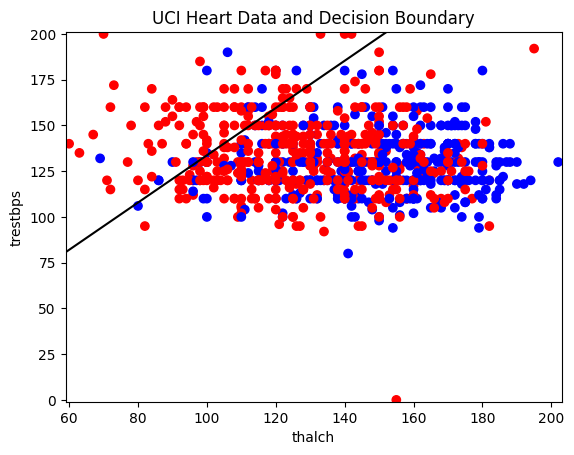

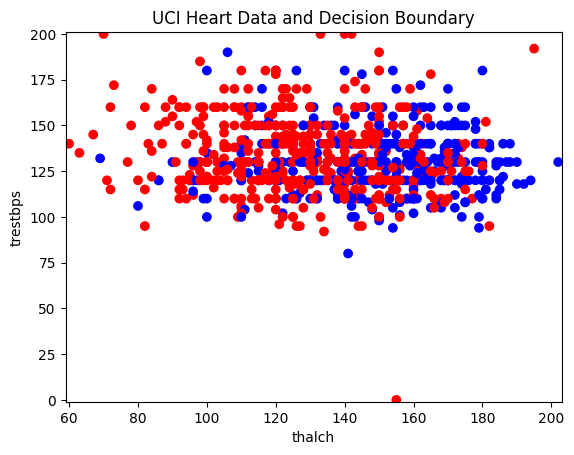

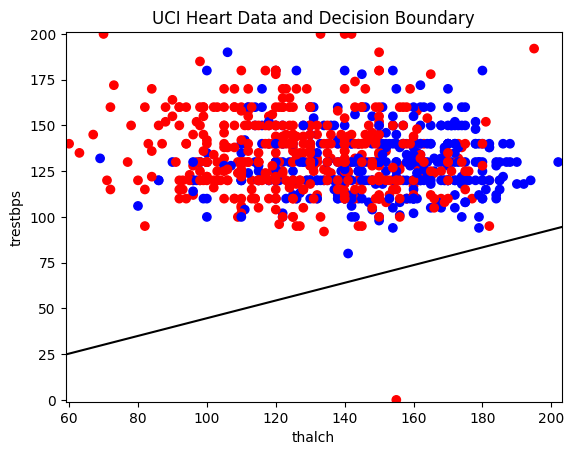

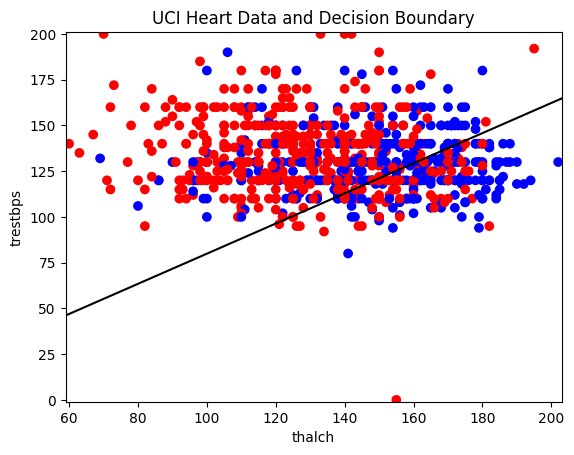

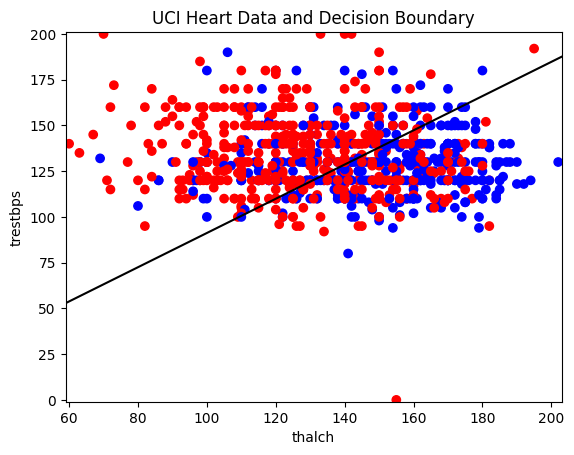

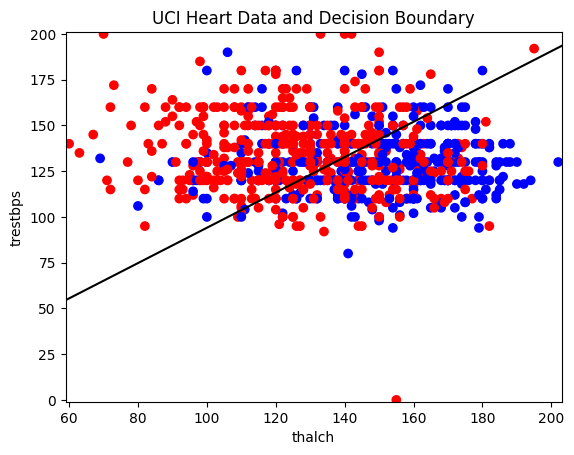

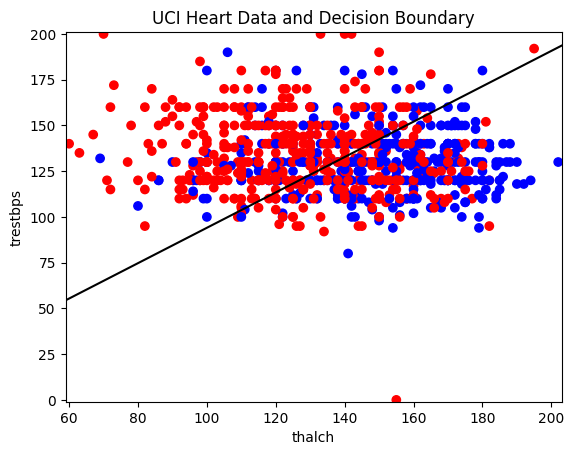

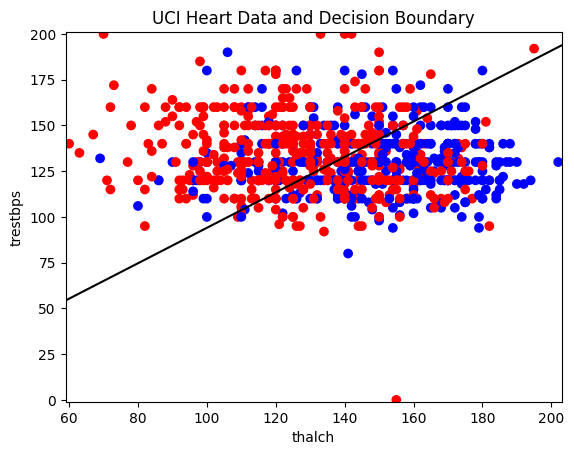

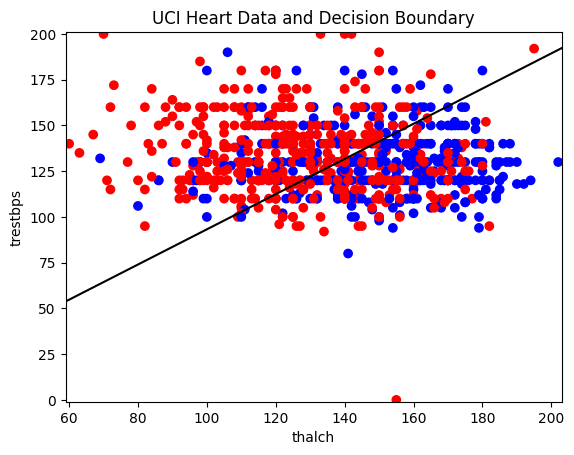

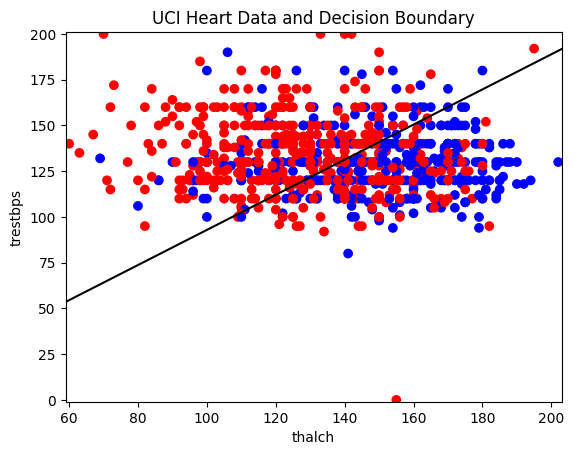

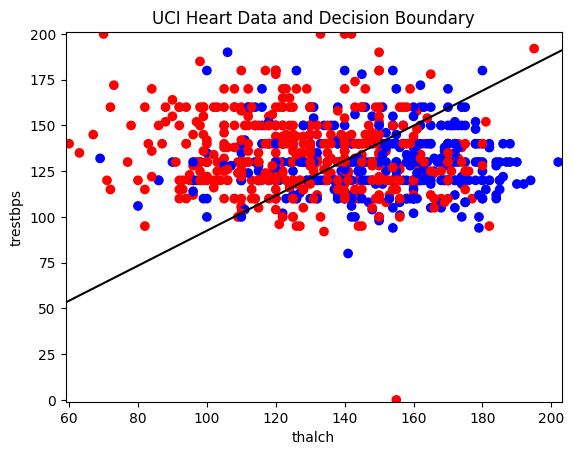

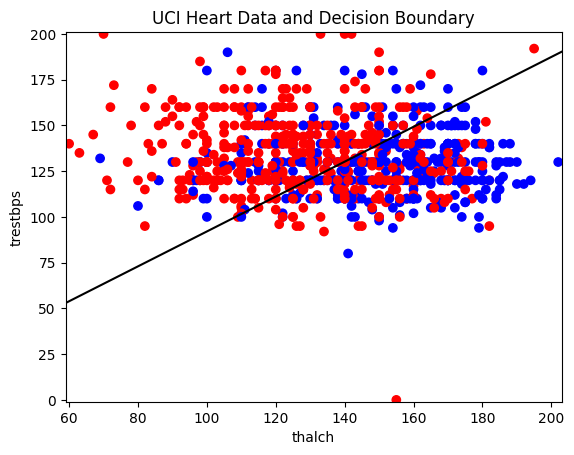

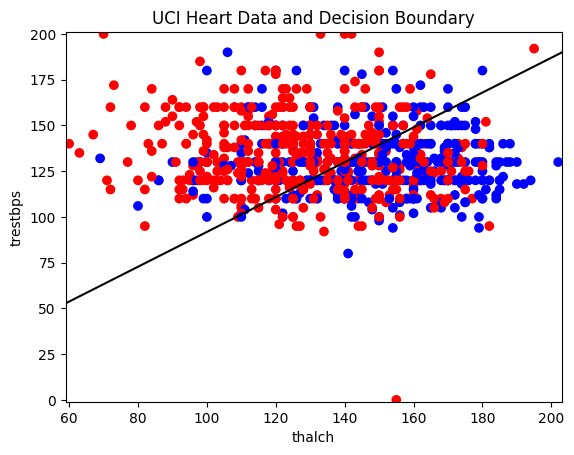

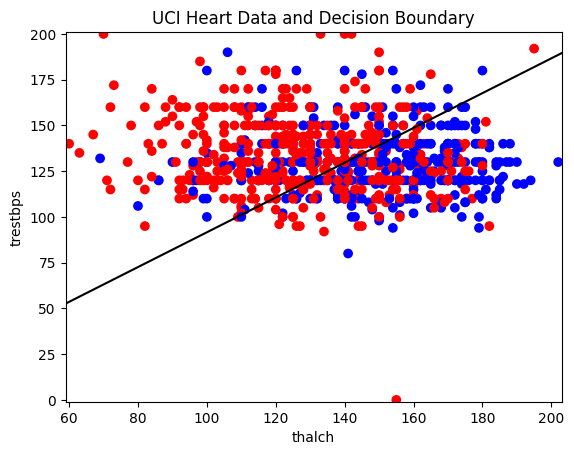

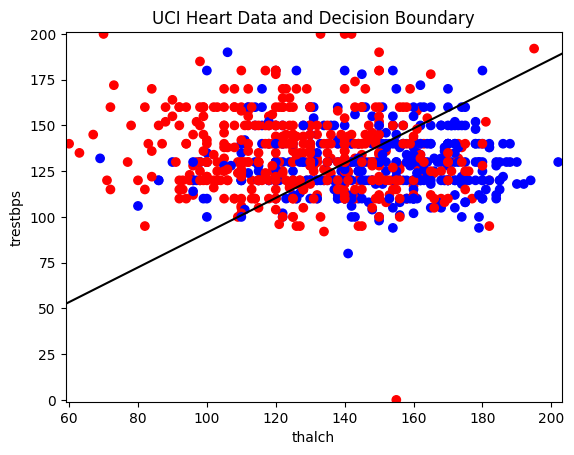

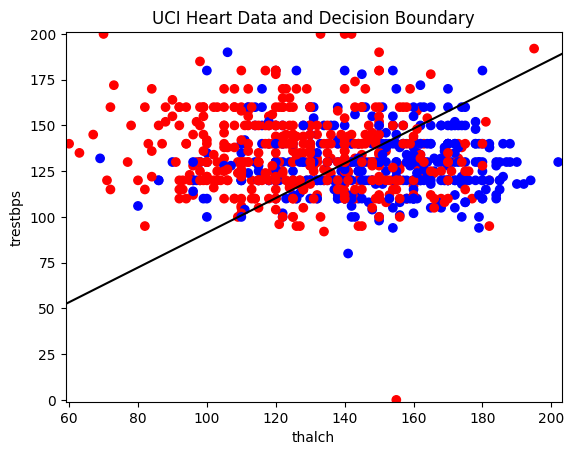

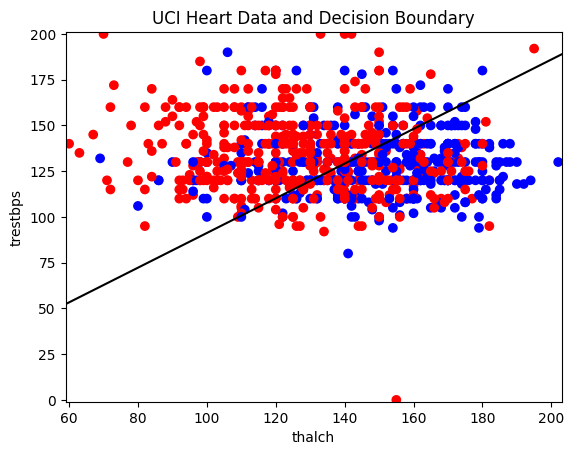

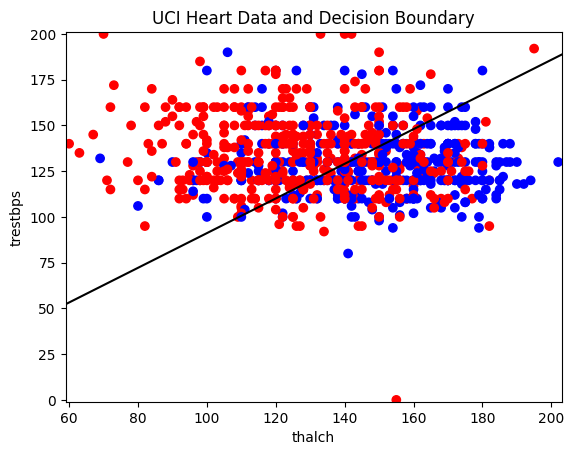

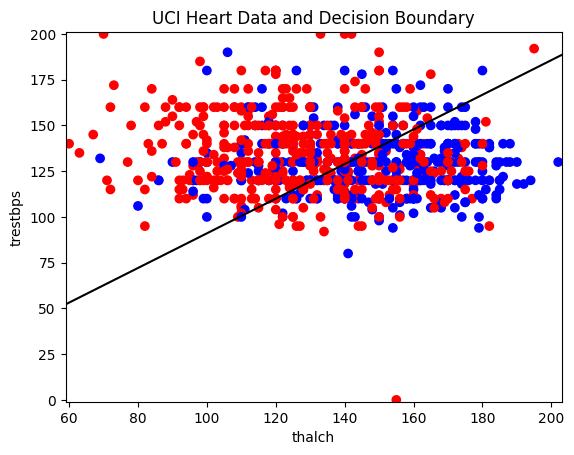

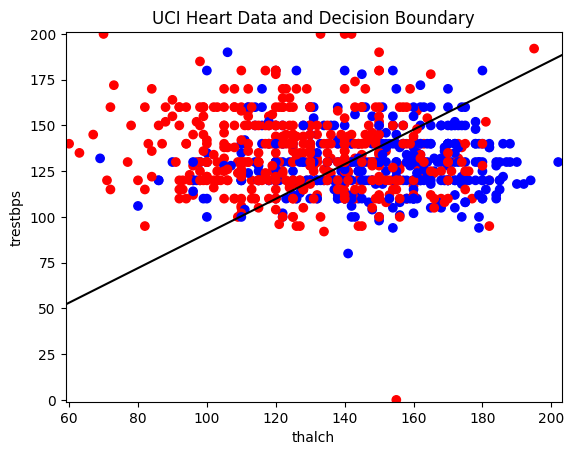

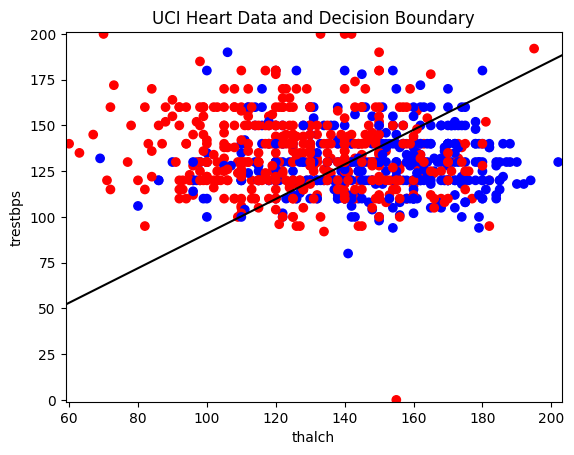

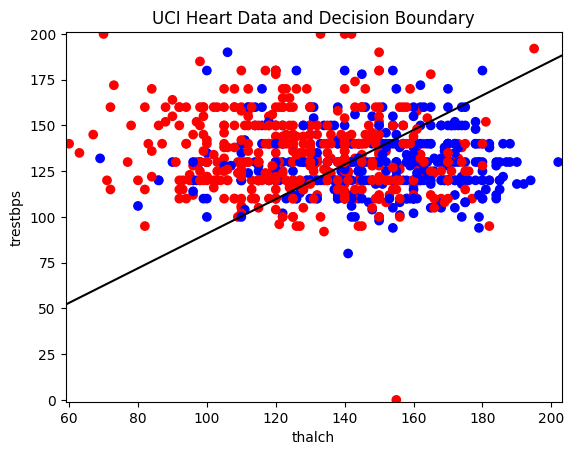

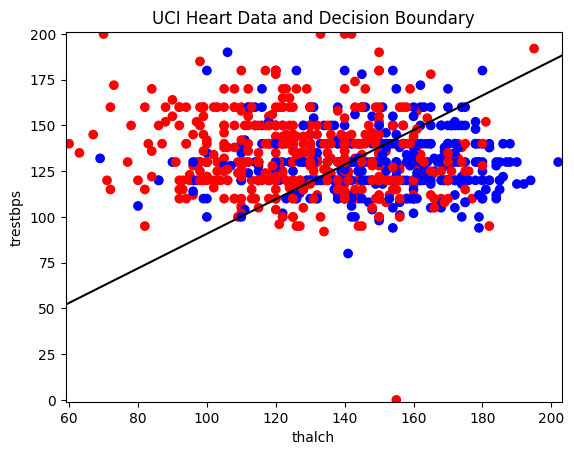

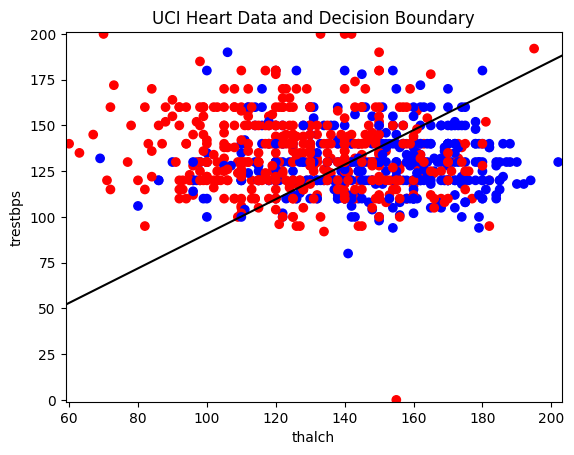

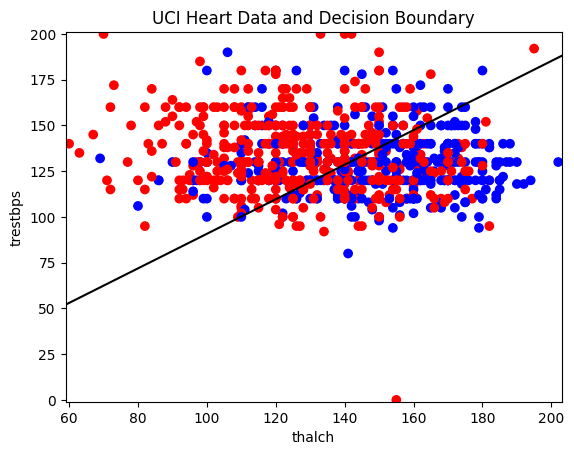

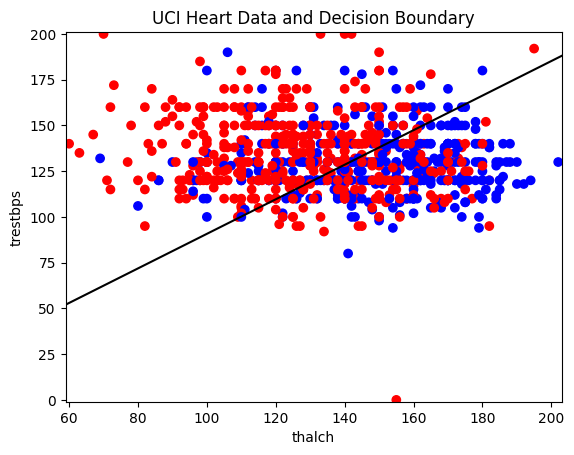

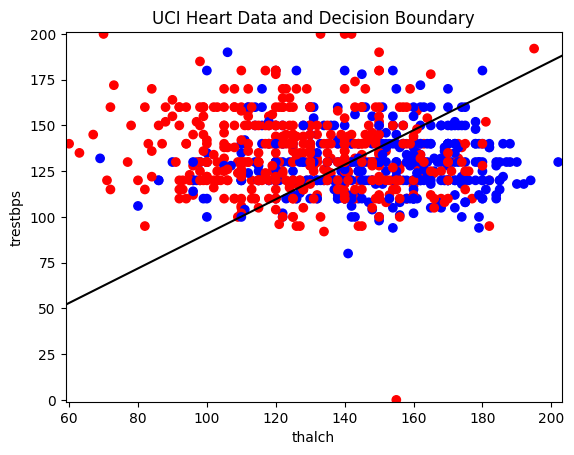

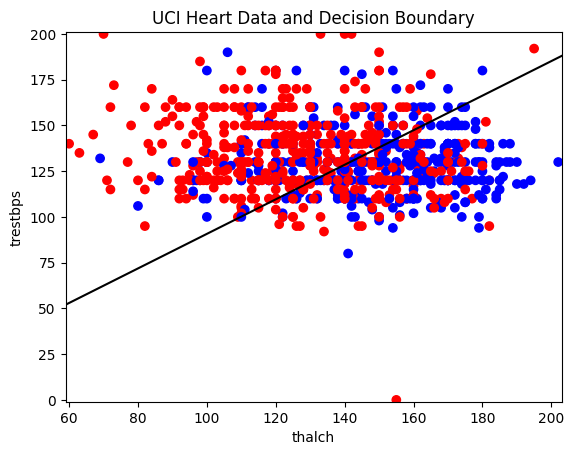

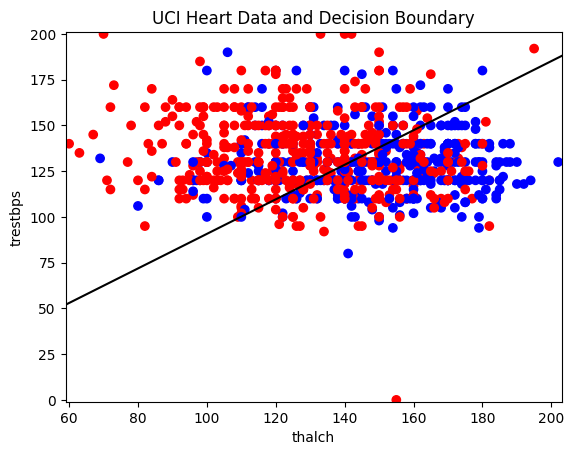

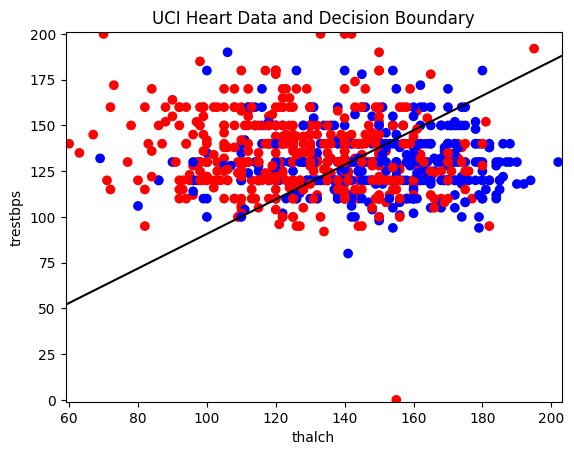

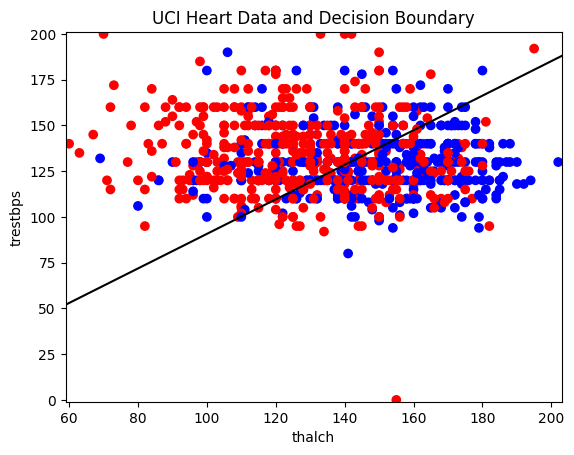

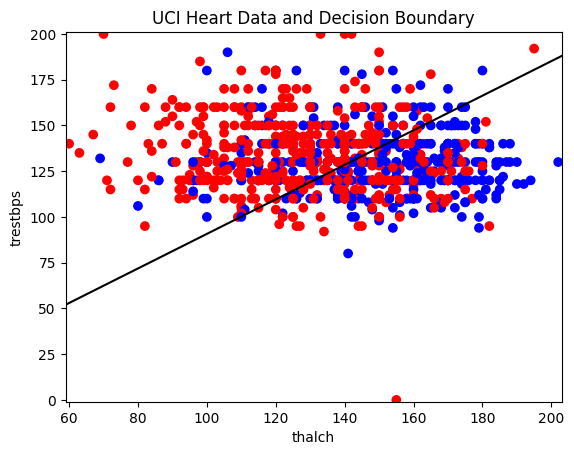

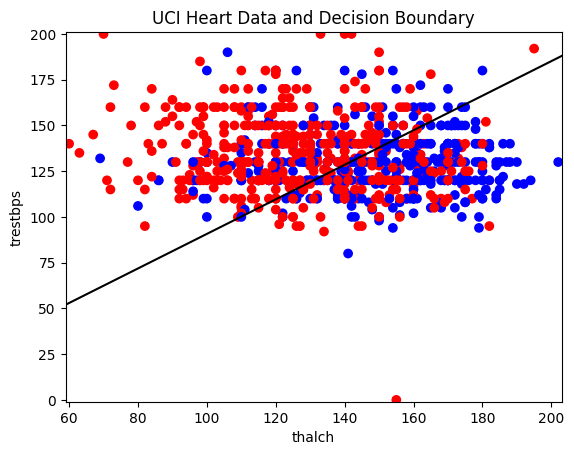

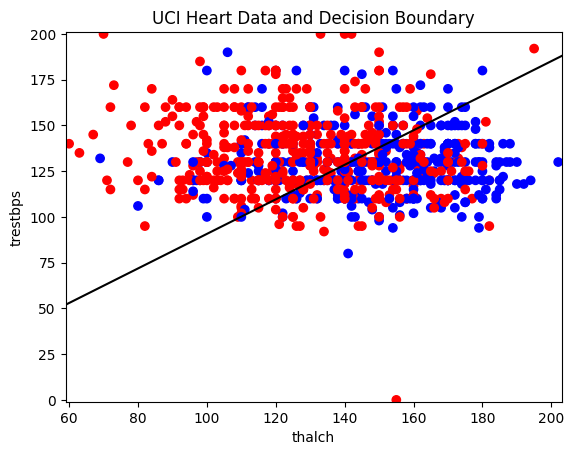

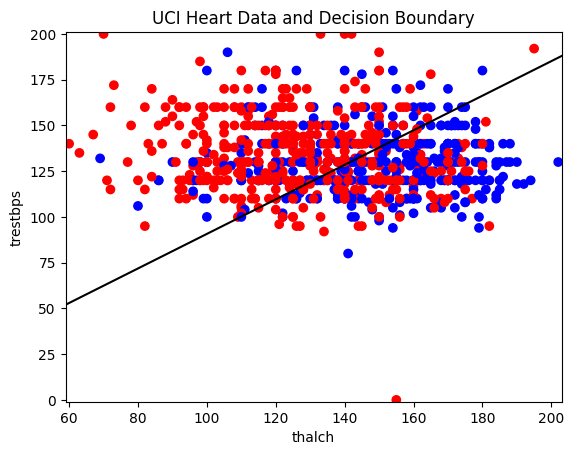

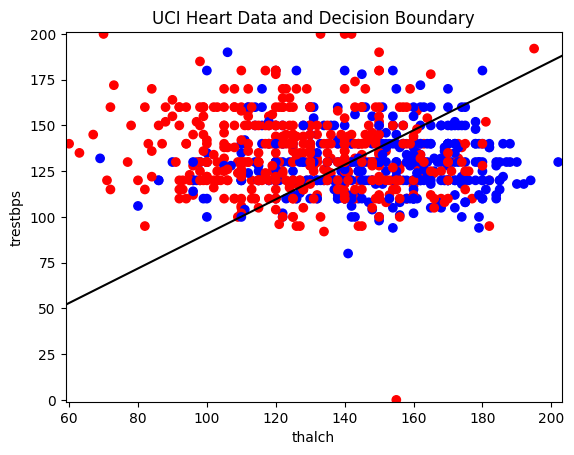

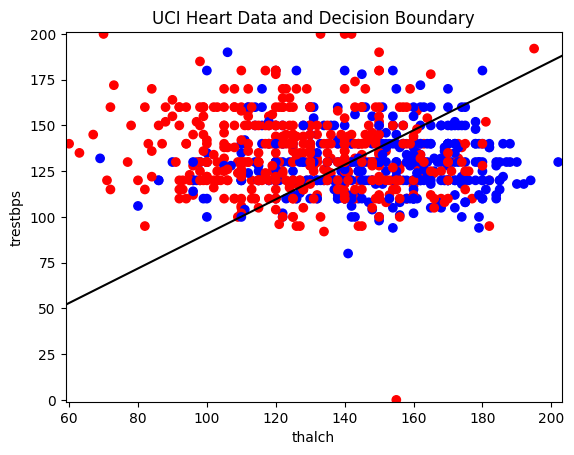

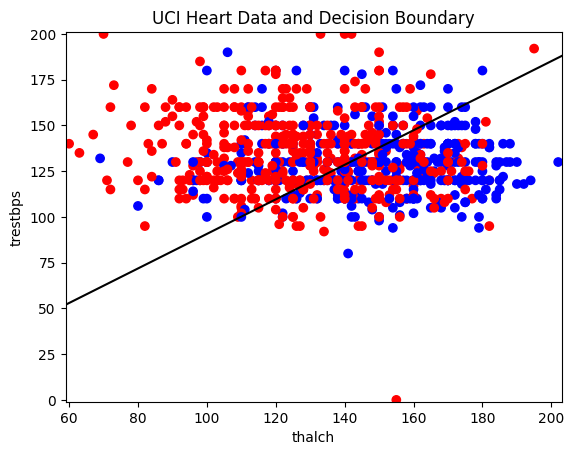

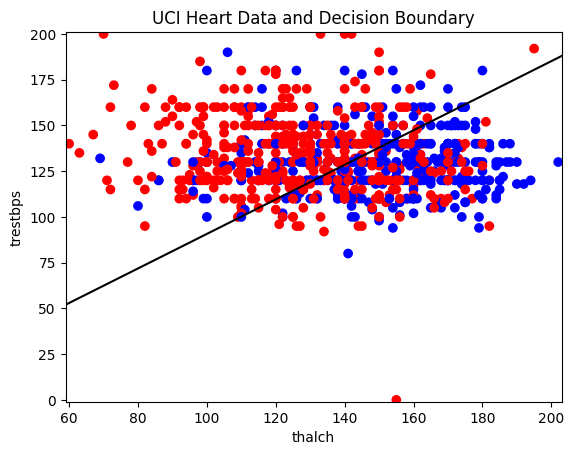

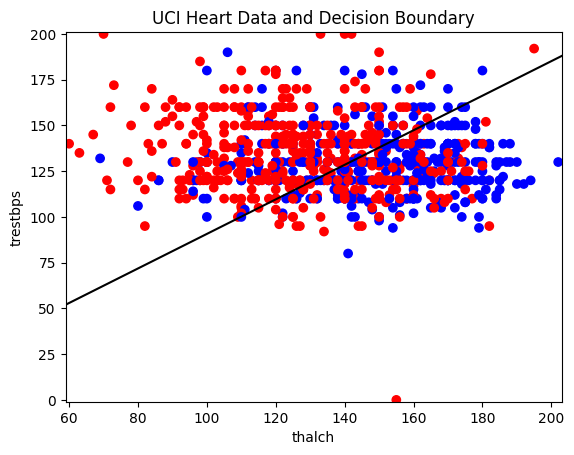

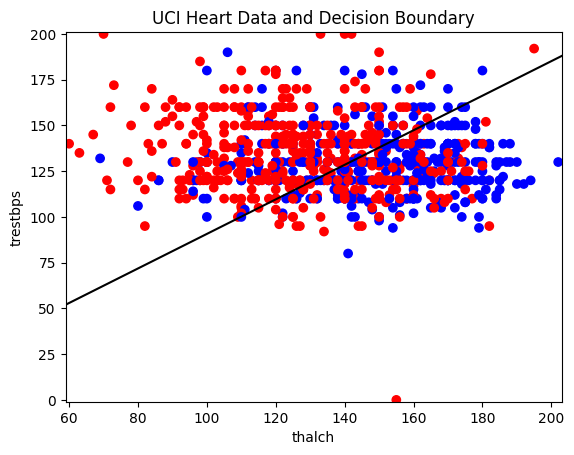

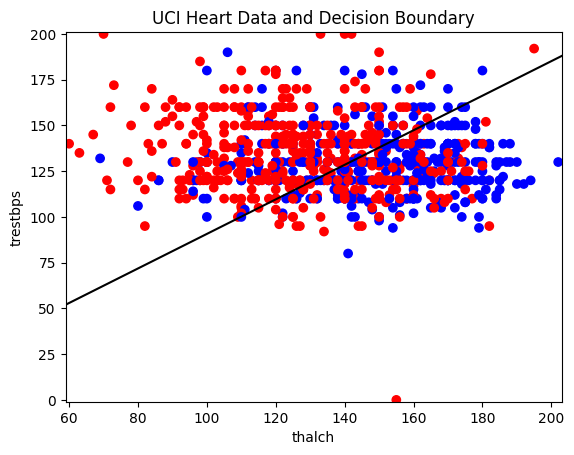

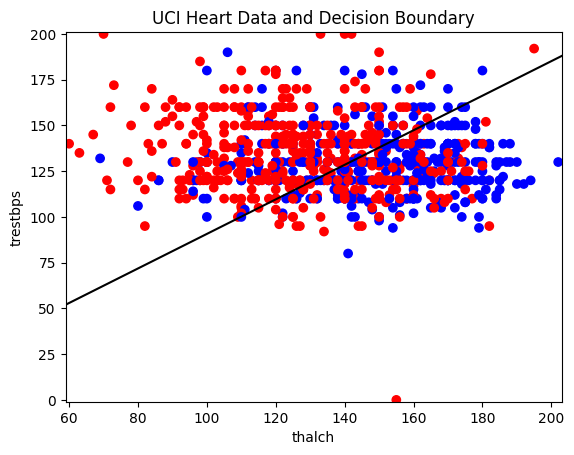

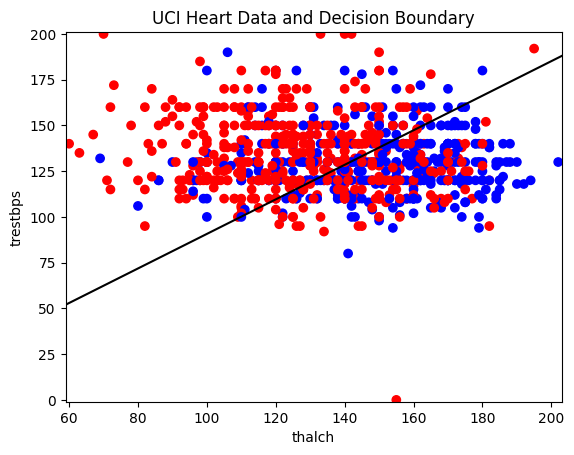

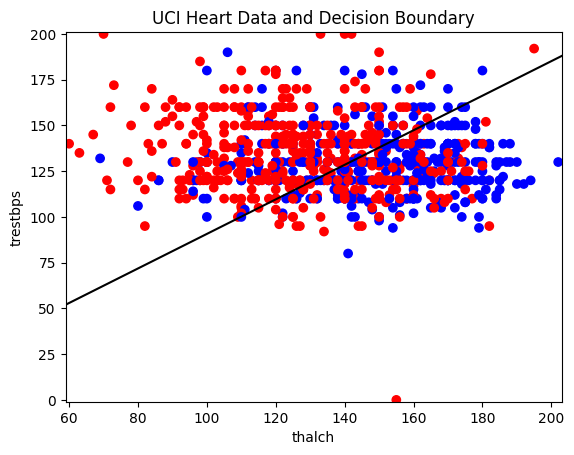

In [13]:
''' 
Begin testing the Perceptron algorithm.
'''

# Import the Perceptron class from "Perceptron.py"
from Perceptron import Perceptron

# Global decay parameter variable
decay_parameter = 0.01

# Global interations variable.
iterations = 50

# Create perceptron object.
sample_perceptron = Perceptron(-2.5, 2, 250, 1)
print()

'''
Global parameter for learning_decay function. Keep track of the amount
of times the learning rate changes.
'''
learning_step = 0



# Create a list of points which represent each row of the .csv file.
list_of_points = []

for i in range (0, 861):
    list_of_points.append([TestData.loc[i, 'thalch'], TestData.loc[i, 'trestbps'],
                           TestData.loc[i, 'ONE'], TestData.loc[i, 'target']])


# Create a list which contains the names of every file created by succeding code below.
list_of_file_names =[]



for i in range(iterations):
    print(f"Iteration: {i}")
    print(f"Learning Rate: {sample_perceptron.learning_rate}")
    sample_perceptron.learning(list_of_points)
    learning_step += 1
    sample_perceptron.learning_rate = ((sample_perceptron.learning_rate) / (1 + decay_parameter*i))
    sample_perceptron.graph(list_of_points, "UCI Heart Data and Decision Boundary" + str(i) + ".png", i, "thalch", "trestbps")
    list_of_file_names.append(f"UCI Heart Data and Decision Boundary" + str(i) + ".png")

        


ims = [imageio.imread(f) for f in list_of_file_names]

imageio.mimwrite("Perceptron_Test.gif", ims)



# # Print new Perceptron attributes.
# print(sample_perceptron.weight1)
# print(sample_perceptron.weight2)
# print(sample_perceptron.bias)



# Print the accuracy of the decision boundary.
print(f"Accuracy of Decision Boundary: {sample_perceptron.get_accuracy(list_of_points)}")
